In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import struct
from pathlib import Path

%matplotlib inline

In [2]:
%load_ext watermark
%watermark -iv

matplotlib 3.0.3
numpy      1.16.4
pandas     0.24.2
seaborn    0.9.0



# File names and data constants

In [3]:
IMAGE_SIZE = 28
LABEL_MAGIC = 2049
IMAGE_MAGIC = 2051

TEST_NITEMS = 10000
test_labels = Path('../data/raw/t10k-labels-idx1-ubyte')
test_images = Path('../data/raw/t10k-images-idx3-ubyte')

TRAIN_NITEMS = 60000
train_labels = Path('../data/raw/train-labels-idx1-ubyte')
train_images = Path('../data/raw/train-images-idx3-ubyte')

# Label File Function

In [4]:
def read_labels( path, count):
    assert(path.exists())
    
    with open(path, 'rb') as fp:
        # make sure we have the expected magic number and number of items
        fmagic = struct.unpack( '>i', fp.read(4))[0]
        fcount = struct.unpack( '>i', fp.read(4))[0]
        assert(LABEL_MAGIC == fmagic)
        assert(count == fcount)
    
        # read the data
        labels = np.ndarray((count), dtype=np.uint8)
        for i in range(count):
            labels[i] = struct.unpack( 'B', fp.read(1))[0]
            
        return labels

# Image File Function

In [5]:
def read_images( path, count):
    assert(path.exists())
    
    with open(path, 'rb') as fp:
        # make sure we have the expected magic number and number of items
        fmagic = struct.unpack( '>i', fp.read(4))[0]
        fcount = struct.unpack( '>i', fp.read(4))[0]
        assert(IMAGE_MAGIC == fmagic)
        assert(count == fcount)
        
        nrow = struct.unpack( '>i', fp.read(4))[0]
        ncol = struct.unpack( '>i', fp.read(4))[0]
        assert(nrow == IMAGE_SIZE)
        assert(ncol == IMAGE_SIZE)
        
    
        # read the data
        images = [0] * count
        imgsize = IMAGE_SIZE * IMAGE_SIZE
        form = 'B' * imgsize
        for i in range(count):
            images[i] = np.array( struct.unpack( form, fp.read(imgsize)), dtype=np.uint8)
        return images

# Read Files

In [7]:
train = pd.DataFrame()
train['label'] = read_labels( train_labels, TRAIN_NITEMS )
train['image'] = read_images( train_images, TRAIN_NITEMS )
train.head()

,label,image
0,5,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,9,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [8]:
test = pd.DataFrame()
test['label'] = read_labels( test_labels, TEST_NITEMS )
test['image'] = read_images( test_images, TEST_NITEMS )
test.head()

,label,image
0,7,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


# Spot check

In [9]:
def spot_check(label, image):
    heat = pd.DataFrame(image.reshape(IMAGE_SIZE,IMAGE_SIZE))
    print('Label = ', label)
    sns.heatmap(heat)
    plt.show()

Label =  4


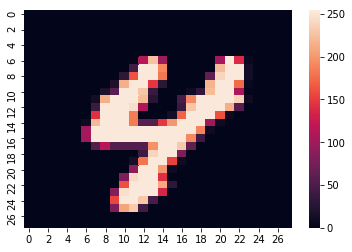

Label =  4


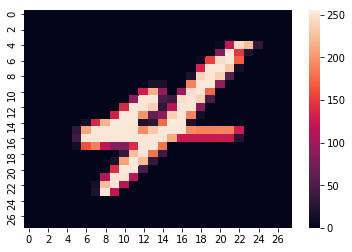

Label =  2


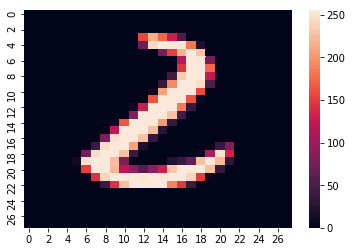

In [10]:
three_tests = test.sample(n=3)
for i in three_tests.index:
    spot_check(three_tests.loc[i, 'label'], three_tests.loc[i, 'image'])

Label =  0


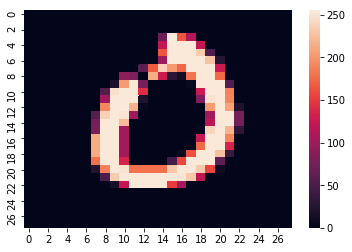

Label =  3


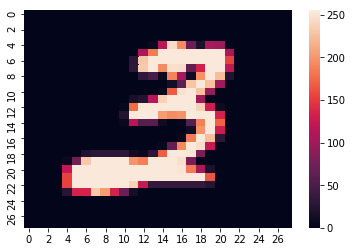

Label =  2


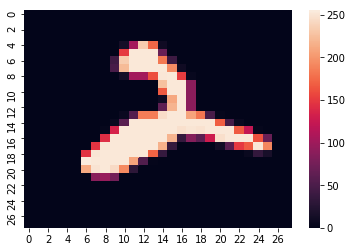

In [11]:
three_trains = train.sample(n=3)
for i in three_trains.index:
    spot_check(three_trains.loc[i, 'label'], three_trains.loc[i, 'image'])

# Write out pickle files for next time

In [13]:
!mkdir ../data/inter

In [14]:
train.to_pickle('../data/inter/train.pkl')
test.to_pickle('../data/inter/test.pkl')